<center><h2><b>CIC-Darknet2020</b></h2></center>
<center><h2><b>Characterization models</b></h2></center>

# Libraries importing and configuration

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

from darknet.classification import *

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [2]:
random_state = 42
dataset_folder = "dataset/" 
img_folder = "imgs/"

np.random.seed(random_state)
plt.rcParams['figure.figsize'] = (18,6)
plt.rcParams["savefig.format"] = 'pdf'
plt.rcParams["savefig.dpi"] = 600
plt.rcParams.update({'font.size': 18})

In [3]:
samples = pd.read_csv(dataset_folder + "darknet_dataset_processed_encoded.csv")
samples = samples[samples['Label'] == 'Darknet']
del samples['Label']
samples.head()

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label.1
117170,0,0,0,0,0,0,0,0,0,0,...,0.589647,0,0,0,0,1.456330e+15,3.683488e+07,1.456330e+15,1.456330e+15,Audio-Streaming
117171,0,0,0,0,0,0,0,0,0,0,...,0.589647,0,0,0,0,1.456330e+15,3.558961e+07,1.456330e+15,1.456330e+15,Audio-Streaming
117172,0,0,0,0,0,0,0,0,0,0,...,0.589647,0,0,0,0,1.456330e+15,3.301057e+07,1.456330e+15,1.456330e+15,Audio-Streaming
117173,0,0,0,0,0,0,0,0,0,0,...,0.589647,0,0,0,0,1.456330e+15,5.227810e+05,1.456330e+15,1.456330e+15,Audio-Streaming
117174,0,0,0,0,0,0,0,0,0,0,...,0.589647,0,0,0,0,1.456330e+15,1.052330e+05,1.456330e+15,1.456330e+15,Audio-Streaming


# Darknet characterization

In [4]:
X, y, labels = split_train_target(samples, "Label.1")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=random_state)
columns = samples.columns.tolist()

metrics = ["Precision", "Recall", "F1-score"]
display = ["Precisão", "Recall", "F-Score"]
models = ["Decision tree", "Random forest"]

## Decision tree

100%|██████████| 10/10 [00:06<00:00,  1.52it/s]


               precision       recall       f1-score       support       
Audio-Streaming:  99.60		99.66		99.63		88830.00		
Browsing:         93.05		83.82		87.85		1750.00		
Chat:             98.93		99.28		99.10		30520.00		
Email:            95.33		95.70		95.45		3930.00		
File-Transfer:    98.27		97.92		98.09		17300.00		
P2P:              97.12		96.25		96.48		1570.00		
VOIP:             97.39		97.97		97.68		9860.00		
Video-Streaming:  96.28		96.16		96.21		9120.00		


 10-fold Accuracy: 98.81%
Test accuracy: 99.03%


Confusion matrix:
[[4387    2   12    0    0    0    0    0]
 [   4   80    0    0    1    1    1    1]
 [   5    4 1479    0    0    0    1    0]
 [   0    0    0  184    5    0    0    0]
 [   1    0    0   11  864    0    0    4]
 [   0    0    0    0    0   63    0    0]
 [   0    0    1    0    0    0  473    5]
 [   2    0    1    0    4    2   10  415]]

Audio-Streaming :   99.73%
Browsing :          93.02%
Chat :              99.06%
Email :             94.36%
File-Tr

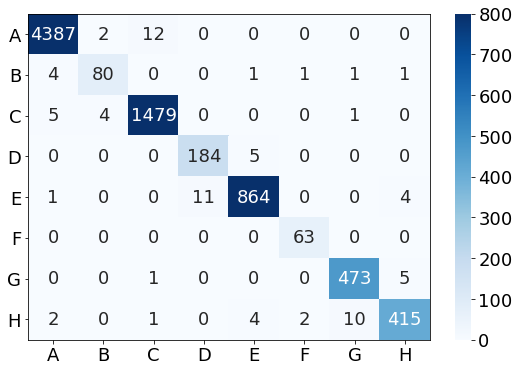

In [5]:
dt = DecisionTreeClassifier(random_state=random_state)
report_dt, accs_dt = evaluate_model(dt, X_train, y_train, X_test, y_test, labels, vmax=800,
                           rotation=(0,0), fname="imgs/dt_conf_app", display_labels=["A", "B", "C", "D", "E","F","G","H"], 
                           figsize=(9,6))

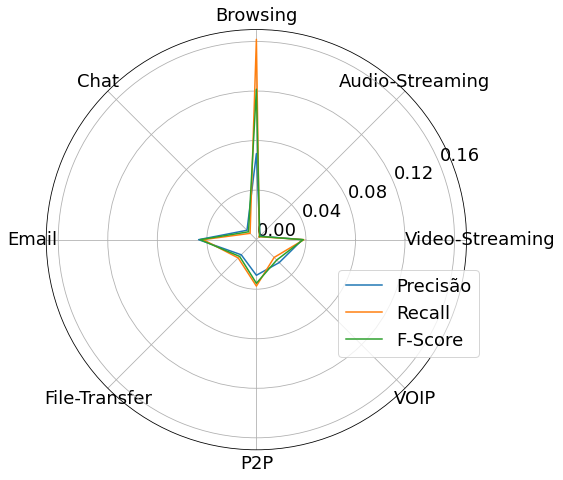

In [46]:
metrics_polar_plot(report_dt, labels, metrics, display, figsize=(8,8), 
                   fname="imgs/comparativo_medidas_dt", bbox_to_anchor=(1.35, 0.2, -0.3, 0.5))

## Random forest

100%|██████████| 10/10 [00:33<00:00,  3.36s/it]


               precision       recall       f1-score       support       
Audio-Streaming:  99.50		99.08		99.29		88830.00		
Browsing:         88.49		83.95		85.87		1750.00		
Chat:             98.51		99.08		98.79		30520.00		
Email:            98.47		95.94		97.15		3930.00		
File-Transfer:    98.03		96.99		97.50		17300.00		
P2P:              95.67		97.50		96.32		1570.00		
VOIP:             97.13		97.26		97.16		9860.00		
Video-Streaming:  91.32		96.27		93.71		9120.00		


 10-fold Accuracy: 98.34%
Test accuracy: 98.34%


Confusion matrix:
[[4361    2   17    0    6    0    0   15]
 [   6   75    4    0    0    0    1    2]
 [   9    3 1462    0   14    0    0    1]
 [   0    0    1  185    3    0    0    0]
 [  10    0    5    4  859    0    0    2]
 [   2    0    0    0    0   61    0    0]
 [   2    1    1    0    1    0  468    6]
 [   1    2    0    0    2    0   10  419]]

Audio-Streaming :   99.32%
Browsing :          90.36%
Chat :              98.12%
Email :             97.88%
File-Tr

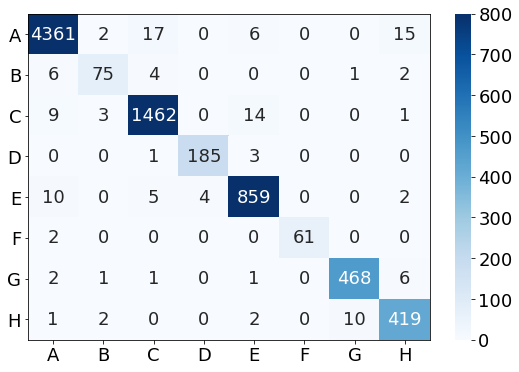

In [7]:
rf = RandomForestClassifier(random_state=random_state)
report_rf, accs_rf = evaluate_model(rf, X_train, y_train, X_test, y_test, labels, 
                         figsize=(9,6), rotation=(0,0), fname="imgs/rf_conf_app",
                        display_labels=["A", "B", "C", "D", "E","F","G","H"], vmax=800)

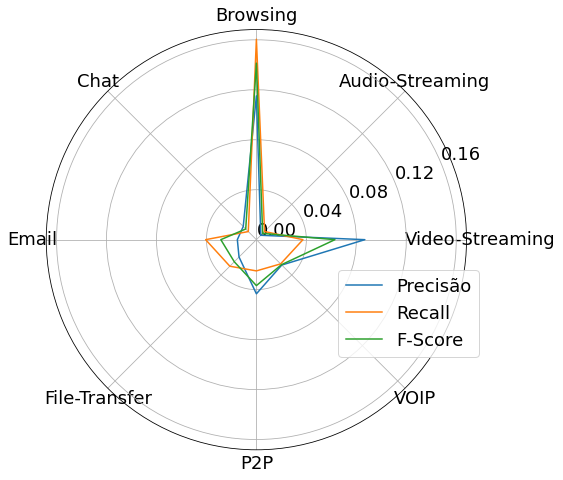

In [45]:
metrics_polar_plot(report_rf, labels, metrics, display, figsize=(8,8), 
                   fname="imgs/comparativo_medidas_rf", bbox_to_anchor=(1.35, 0.2, -0.3, 0.5))

## Models accuracy comparison

In [9]:
accs = {models[0]: accs_dt, models[1]: accs_rf}
accs

{'Decision tree': {'Audio-Streaming': 99.7272107297113,
  'Browsing': 93.02325581395348,
  'Chat': 99.06229068988614,
  'Email': 94.35897435897435,
  'File-Transfer': 98.8558352402746,
  'P2P': 95.45454545454545,
  'VOIP': 97.52577319587628,
  'Video-Streaming': 97.6470588235294},
 'Random forest': {'Audio-Streaming': 99.31678433158734,
  'Browsing': 90.36144578313254,
  'Chat': 98.12080536912752,
  'Email': 97.88359788359789,
  'File-Transfer': 97.06214689265536,
  'P2P': 100.0,
  'VOIP': 97.7035490605428,
  'Video-Streaming': 94.15730337078652}}

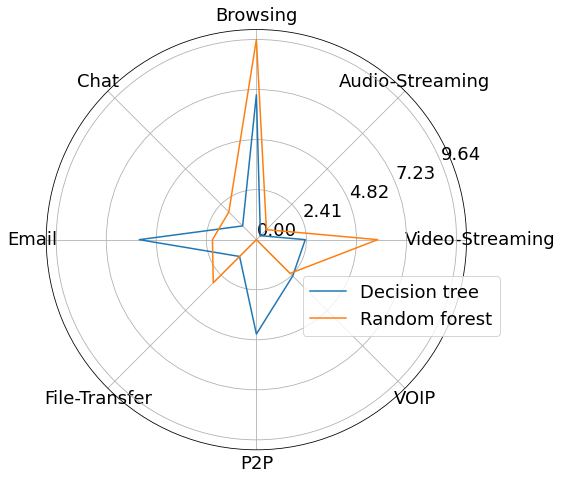

In [64]:
accuracy_polar_plot(accs, labels, models, figsize=(8,8), 
                    bbox_to_anchor=(1, 0.25, 0.1,4), fname='imgs/comparativo_acc')